## Problem 1B – Numerical Solution of Cosmic Inflation using RK4

We numerically solve the Friedmann equations for different equations of state (w = 0, 1, -1/3) using an adaptive RK4 method.


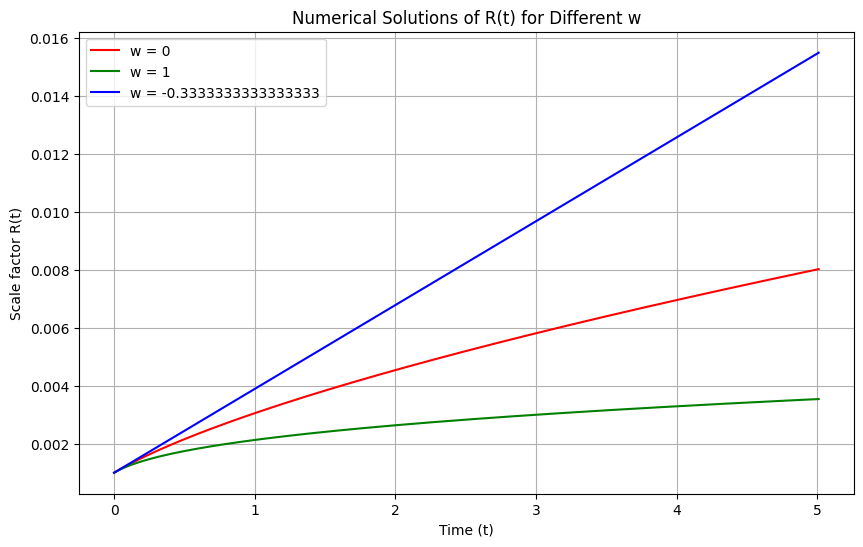

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 1  # Scaled units

def Hubble(rho):
    return np.sqrt((8 * np.pi * G / 3) * rho)

def drho_dt(rho, H, w):
    return -3 * H * (1 + w) * rho

def dR_dt(R, H):
    return H * R

# Adaptive RK4 solver
def rk4_adaptive(t_max, dt, R0, rho0, w):
    t = [0]
    R = [R0]
    rho = [rho0]
    
    while t[-1] < t_max:
        r = R[-1]
        ro = rho[-1]
        h = Hubble(ro)
        
        k1_r = dt * dR_dt(r, h)
        k1_rho = dt * drho_dt(ro, h, w)

        h = Hubble(ro + 0.5*k1_rho)
        k2_r = dt * dR_dt(r + 0.5*k1_r, h)
        k2_rho = dt * drho_dt(ro + 0.5*k1_rho, h, w)

        h = Hubble(ro + 0.5*k2_rho)
        k3_r = dt * dR_dt(r + 0.5*k2_r, h)
        k3_rho = dt * drho_dt(ro + 0.5*k2_rho, h, w)

        h = Hubble(ro + k3_rho)
        k4_r = dt * dR_dt(r + k3_r, h)
        k4_rho = dt * drho_dt(ro + k3_rho, h, w)

        R.append(r + (k1_r + 2*k2_r + 2*k3_r + k4_r)/6)
        rho.append(ro + (k1_rho + 2*k2_rho + 2*k3_rho + k4_rho)/6)
        t.append(t[-1] + dt)

    return np.array(t), np.array(R), np.array(rho)

# Simulate for different w values
w_values = [0, 1, -1/3]
colors = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
for w, c in zip(w_values, colors):
    t, R, _ = rk4_adaptive(5, 0.01, 1e-3, 1, w)
    plt.plot(t, R, label=f"w = {w}", color=c)

plt.xlabel("Time (t)")
plt.ylabel("Scale factor R(t)")
plt.title("Numerical Solutions of R(t) for Different w")
plt.legend()
plt.grid()
plt.show()


Comparing the Analytic Solution from Problem 1A and the numerical solution from 1B, we see that the two solutions are in agreement with each other.